# Import

In [ ]:
# CASO o arquivo esteja solto em \content:

# 0.1.0
# !pip  install eeos-0.1.0-cp311-cp311-manylinux_2_34_x86_64.whl
# !pip  install --force-reinstall eeos-0.1.0-cp311-cp311-manylinux_2_34_x86_64.whl

# 0.1.1
# !pip  install eeos-0.1.1-cp311-cp311-manylinux_2_34_x86_64.whl
# !pip  install --force-reinstall eeos-0.1.1-cp311-cp311-manylinux_2_34_x86_64.whl

# Se estiver em outro diretório, copiar o endereço e fazer:
# !pip install '\enreço\ate\eeos-0.1.0-cp311-cp311-manylinux_2_34_x86_64.whl' "


ERROR: eeos-0.1.1-cp311-cp311-manylinux_2_34_x86_64.whl is not a supported wheel on this platform.


In [2]:
# from eeos import CPAEquationOfState
# from eeos import StateCPA

# from eeos import EquationOfState,State,CPAParameters,PhaseEquilibrium,CubicRecord,AssociationRecord

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt


## RECORDS

In [3]:
c_co2=CubicRecord(
    a0=0.35079,
    b=0.0272e-3,
    c1=0.7602,
    tc=304.12,
)
c_ch4=CubicRecord(
    a0=0.23204,
    b=0.0291e-3,
    c1=0.447,
    tc= 190.56,
)
c_w=CubicRecord(
    a0= 0.12277,
    b=0.0145e-3,
    c1=0.6736,
    tc=647.14,
)

c_acoh=CubicRecord(
    a0= 0.91196,
    b=0.0468e-3,
    c1=0.4644,
    tc=594.8,
)
# antes
c_propanoic=CubicRecord(
    a0= 1.326756,
    b=0.06406e-3,
    c1= 0.68908,
    tc= 612.2,
)
c_methanol_2b=CubicRecord(
    a0= 0.40531,
    b=0.0000309,
    c1=0.4310,
    tc=513.,
)
c_methanol_3b=CubicRecord(
    a0= 4.5897e-1,
    b= 0.0334e-3,
    c1=1.0068,
    tc=513.,
)

c_octanol_2b=CubicRecord(
    a0= 4.15822,
    b=0.1485e-3,
    c1=1.1486,
    tc=655.5,
)
c_octanol_3b=CubicRecord(
    a0= 41.9005e-1,
    b= 0.1489e-3,
    c1= 1.0550,
    tc=655.5,
)
c_octane=CubicRecord(
    a0= 34.8750e-1,
    b=0.1424e-3,
    c1= 0.99415,
    tc=568.7,
)
c_heptane=CubicRecord(
    a0= 29.17800e-1,
    b=0.125350e-3,
    c1= 0.913700,
    tc=540.0,
)


a_co2=AssociationRecord.solvate(
    b=0.0272e-3,
    na=0,
    nb=1,
    nc=0)

a_w=AssociationRecord.associative(
    eps=166.55e2,
    beta=0.0692,
    b=0.0145e-3,
    na=2,
    nb=2,
    nc=0)

a_acoh=AssociationRecord.associative(
    eps=403.23e2,
    beta=4.5e-3,
    b=0.0468e-3,
    na=0,
    nb=0,
    nc=1)

a_methanol_2b=AssociationRecord.associative(
    eps=24591.0,
    beta=0.01610,
    b=0.0000309,
    na=1,
    nb=1,
    nc=0)

a_methanol_3b=AssociationRecord.associative(
    eps=160.70e2,
    beta=34.4e-3,
    b= 0.0334e-3,
    na=2,
    nb=1,
    nc=0)

a_propanoic=AssociationRecord.associative(
    eps=399.746e2,
    beta=2.07e-3,
    b= 0.06406e-3,
    na=0,
    nb=0,
    nc=1)

a_octanol_2b=AssociationRecord.associative(
    eps=267.59e2,
    beta=0.14e-3,
    b= 0.1485e-3,
    na=1,
    nb=1,
    nc=0)
a_octanol_3b=AssociationRecord.associative(
    eps=250.00e2,
    beta= 0.2e-3,
    b= 0.1489e-3,
    na=2,
    nb=1,
    nc=0)

a_octane=AssociationRecord.inert(0.1424e-3)
a_heptane=AssociationRecord.inert(0.125350e-3)
a_ch4=AssociationRecord.inert(0.0291e-3)


# tudo do NIST
# log10, P/BAR,T/Kelvin

water_antoine= np.array([6.20963,2354.731,  7.559])
acoh_antoine=np.array([4.68206, 1642.54,    -39.764 ])
co2_antoine=np.array([6.81228,  1301.679,   -3.494])

octane_antoine=np.array([4.04867    ,1355.126   ,-63.633    ])
propanoic_antoine=np.array([4.74558 ,1679.869,  -59.832])

heptane_antoine=np.array([4.02832   ,1268.636   ,-56.199])

octanol_antoine=np.array([6.47682   ,2603.359   ,-48.799    ])
metoh_antoine=np.array([5.20409,    1581.341,   -33.50])

NameError: name 'CubicRecord' is not defined

## Experimental Data

In [ ]:

acoh_octane={}
xbol=np.array([0.227901684	,
0.294626872	,
0.348514208	,
0.43464031	,
0.477690357	,
0.533389687	,
0.584246917	,
0.609662527	,
0.616375144	,
0.642833301	,
0.6712335	  ,
0.699588183	,
0.704410777	,
0.740644168	,
0.804176691	,
0.824698182	,
0.8344279	  ,
0.856949953	,
0.945520948	,
0.97332293	,
0.993356742	])


pbol=np.array([26.43155385,
27.81751306,
28.49348245,
29.06416542,
29.27855301,
29.17409888,
29.31781,
29.31871166,
28.60941544,
28.96512127,
29.24994256,
29.28642521,
28.93182912,
29.28788174,
29.25465895,
29.21991027,
28.97191842,
29.18557774,
27.09559356,
24.11653554,
21.42101567])

xorv=np.array([0.0,0.576884063,
0.608405401,
0.729468756,
0.823742333,
0.924917095,1.0])

porv=np.array([15.9221579209744,
26.47941132,
27.79316817,
26.98149858,
24.00479875,
21.34763422,18.8314758220083])

acoh_octane["bol"]=(xbol,pbol)
acoh_octane["orv"]=(xorv,porv)


xorv = np.array([
    0.860323206205559, 0.5932794656324067, 0.3804740357681534, 0.2838375350140056,
    0.21208791208791206, 0.1750484809308338, 0.16596423184658476, 0.14479422538246067,
    0.12287868993751343, 0.10624218918336563, 0.09038138332255975, 0.07451195862960565,
    0.06017022193492781, 0.043553113553113545, 0.029965524671406993, 0.015634561516914433
])

porv = np.array([
    3.114285714285714, 4.614285714285714, 7.314285714285713, 9.414285714285715,
    11.514285714285714, 13.228571428571428, 13.914285714285713, 14.985714285714286,
    15.885714285714284, 16.785714285714285, 17.257142857142856, 17.9,
    18.15714285714286, 18.67142857142857, 18.928571428571427, 18.97142857142857
])


xbol = np.array([
    1.0, 0.9885240249946131, 0.9688407670760609, 0.9317539323421676,
    0.8909308338720102, 0.8184205990088342, 0.7421719457013574, 0.7044279250161601,
    0.6070825253178195, 0.5067442361560007, 0.40715147597500534, 0.3128571428571428,
    0.2396746390864038, 0.16424046541693593, 0.10312648136177542,
    0.06390648567119152, 0.02920491273432449,0.0
])

pbol = np.array([
    2.2142857142857117, 3.1999999999999993, 4.699999999999999, 7.357142857142854,
    9.328571428571426, 11.557142857142857, 13.14285714285714, 13.87142857142857,
    15.07142857142857, 15.799999999999999, 16.7, 17.214285714285715,
    17.814285714285713, 18.2, 18.757142857142856, 18.84285714285714,
    19.057142857142857, 19.142857142857142
])

propanoic_hep={}

propanoic_hep["bol"]=(xbol,pbol)
propanoic_hep["orv"]=(xorv,porv)

x1 = np.array([
    0.0000, 0.0032, 0.0079, 0.0127, 0.0169, 0.0242, 0.0278, 0.0419, 0.0592, 0.1002,
    0.1477, 0.1635, 0.2064, 0.2646, 0.3662, 0.4390, 0.5053, 0.5823, 0.6433,
    0.7358, 0.8143, 0.8978, 0.9522, 0.9819, 1.0000
])
y1 = np.array([
    0.0000, 0.1564, 0.3085, 0.4072, 0.5053, 0.6062, 0.6674, 0.7691, 0.8432,
    0.9109, 0.9512, 0.9632, 0.9756, 0.9848, 0.9917, 0.9937, 0.9957, 0.9968,
    0.9973, 0.9979, 0.9987, 0.9990, 0.9992, 0.9995, 1.0000
])
T = np.array([
    467.85, 461.88, 455.06, 449.29, 444.51, 437.95, 433.78, 424.43, 414.68,
    401.33, 388.40, 383.64, 377.25, 368.40, 360.18, 355.64, 352.24, 349.62,
    347.13, 344.03, 341.99, 340.06, 338.87, 338.15, 337.75
])
metoh_otctanol={}

metoh_otctanol["bol"]=(x1,T)
metoh_otctanol["orv"]=(y1,T)


xorv=np.array([
0.0                 ,
0.014864237869629149,
0.05386962914556445 ,
0.07203659532756088 ,
0.08488809018134288 ,
0.16600947557588633 ,
0.1806476066002287  ,
0.20105080869139028 ,
0.2746740728639111  ,
0.37138376082339486 ,
0.5080267930076785  ,
0.5537239013233132  ,
0.6273393236399282  ,
0.7462153242934163  ,
0.756420192778958   ,
0.8127430158470842  ,
0.8752752818166972  ,
0.8987786309426568  ,
1.00                ,])


torv=np.array([
 371.47518379349776,
 370.82423133474924,
 371.5275935304689,
 371.5844469857866,
 371.7009246855089,
 373.5202613951968,
 374.28549583401406,
 375.28603822904756,
   378.6401829766378,
 384.11549746773403,
 392.1819702662964,
 394.9494396340467,
 397.94960300604475,
 404.0122725044927,
 404.66003594183957,
 407.07226923705275,
 409.77875510537496,
 410.7199346512008,
 414.719751674563   ,])
xbol=np.array([
0.37690965528508413,
0.4655618363012579 ,
0.6685574252573108 ,
0.7984982845940203 ,
0.8952654794968139 ,
0.9183636660676361 ,
0.9392530632249633 ,
0.9673033818003597 ,
0.9668760006534881 ,
0.9771161574906063 ,
0.984264009148832  ,
0.9900499918314    ,])

tbol=np.array([
373.5543734683875  ,
375.3138245384741,
378.5347100147035,
384.0651004737788,
392.1362783858847,
394.788420192779,
397.7358078745303,
403.92718836791374,
404.63520339813755,
406.8758830256494,
409.52990687796114 ,
410.70916516909,])

propanoic_hep_teb={}

propanoic_hep_teb["orv"]=(xorv,torv)
propanoic_hep_teb["bol"]=(xbol,tbol)


xbol=np.array([-0.0012736632222163924,
0.10119557553656855,
0.11826493711287839,
0.2160830307119626 ,
0.3511709362182816 ,
0.3899987111741204 ,
0.46302965057656004,
0.5919577265111484 ,
0.6944951972282662 ,
0.7519919941168891 ,
1.00526902344905   ,])

pbol=np.array([
    3.484189138988498,
5.337369127313252,
5.532133461710501,
7.385540889896369,
10.019521921411947,
10.897818851731959,
12.99693714320372,
16.169116699392738,
18.902488950213417,
20.61116881344625,
27.884847198319985 ,
])

xorv=np.array([
0.2856910002046959 ,
0.32912064168366156,
0.5463181277150633 ,
0.752723592336793  ,
0.7946483400680806 ,
0.8537296346557701 ,
0.9345807146160436 ,
0.9441066541322032 ,
0.9845454614375717 ,])

porv=np.array([5.328347346155887,
5.570722424812171,
7.418292229896213,
10.048785850208109,
10.878031583815385,
13.026731765009139,
16.00566325254165,
18.890283011000513,
20.550897250252085,])


metoh_acoh={}

metoh_acoh["orv"]=(xorv,porv)
metoh_acoh["bol"]=(xbol,pbol)

yorv=np.array([0.0 ,
0.11182235411849956,
0.16713827254218566,
0.23011778644305642,
0.28236826667586873,
0.35151891599664126,
0.4160771593222677 ,
0.5098548374109986 ,
0.5867208438294396 ,
0.6528060549593382 ,
0.8127034519249572 ,
0.9187716392330076 ,
1.0                ,])

porv=np.array([0.04783176323084533 ,
0.052450510139526334,
0.054236631123687276,
0.05676926970104789,
0.05825678364792897,
0.06033990130784362,
0.061825574841551934,
0.06360594453454801,
0.06508977765508357,
0.06687428827771835,
0.06954196717163004,
0.07176909716231294,
0.07370107089041492,])


pbol=np.array([0.052688196007102964 ,
0.054535539946943504,
0.05705464531945333,
0.058569846941343096,
0.06058944477594773,
0.06210665938158264,
0.0642987986800578,
0.06548300826042258,
0.06683257007699664,
0.07037714688311035,
0.0722414574002315,])

xbol=np.array([0.062395306872182726,
0.10027534741942673,
0.15192994816566863,
0.20525963895698685,
0.2723567007196417,
0.3377139693882686,
0.4357462777773784,
0.5113985204569472,
0.5750303744868689,
0.7538767910163412,
0.8931321308151866,  ])

water_acoh={}

water_acoh["orv"]=(xorv,porv)
water_acoh["bol"]=(xbol,pbol)


## Algoritmos VLE

In [ ]:
def vle_diagram(T,phase_eq,N=100,factor=1e5):
  vx=np.linspace(0.00001,0.9999,N)
  calc_p=np.zeros_like(vx)
  calc_vy=np.zeros_like(vx)

  for i in range(len(vx)):

      try:
        x=np.array([vx[i],1-vx[i]])
        # p,y,*_=BubblePy(eos,T,x,guess_p,guess_y) #calculado em Pa
        p,y=phase_eq.bbpy(T,x,tol_p=1e-6,tol_y=1e-6)
        # print(p)
        calc_p[i]=p/factor #armazena em bar
        calc_vy[i]=y[0] #composição de acido acetico

      except Exception as e:
        print(e)
        continue

  return [calc_p,calc_vy,vx]

def VLE_DIAGRAM(p_or_t,
                peq,antoine,
                y_label,
                x_label,
                title,
                exp_data=None,
                factor=1.0,
                y_lim=None,
                x_figsize=5,
                y_figsize=5,
                save_fig=False,
                plot_dir="plots",
                tol=1e-6,
                N_points=100):

  '''
  P_or_T: tupla ; ex: ("t",300) em Kelvin; ("p",500) em bar
  xorv,orv,xbol,bol=exp_data
  '''

  var_str,var=p_or_t

  # print(var_str,var)
  linspaceZ=np.linspace(0.00001,0.9999,N_points)
  BOL=np.zeros_like(linspaceZ)
  XPHASE=np.zeros_like(linspaceZ)
  
  for (i,z1) in enumerate(linspaceZ):

    try:
      z=np.array([z1,1-z1])
      # print(z)

      # print(z)
      calc_bol,x1=tpd_root_(var_str,var,z,"vapor",peq ,antoine,tol)
      # calc_bol,x1=tpd_root_(var_str,var,z,"vapor",peq ,antoine)
      # calc_orv=tpd_root_(var_str,var,z,"liquid",peq,antoine)
      # print('z=',z,'var=',var)
      # print('Tbol=',calc_bol)
      # print('x1=',x1)
      BOL[i]=calc_bol/factor
      XPHASE[i]=x1
    except Exception as e:
      print(e)
    # ORV[i]=calc_orv/factor

  if y_lim==None:
    y_sup=np.max(BOL)*1.1
    y_inf=np.min(BOL)*0.9
  else:
    y_sup=y_lim[1]
    y_inf=y_lim[0]

  # ORV
  # plt.scatter(XPHASE,BOL)
  if exp_data!=None:
    plt.figure(figsize=(x_figsize, y_figsize))
    # plt.xlim(0,1.0)
    plt.ylim(y_inf,y_sup)
    xorv,orv,xbol,bol=exp_data

    plt.plot(XPHASE,BOL)
    plt.scatter(xorv,orv)
    # BOL
    # plt.scatter(linspaceZ, BOL)
    plt.plot(linspaceZ, BOL)
    plt.scatter(xbol,bol)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    if save_fig:
      os.makedirs(plot_dir, exist_ok=True)

      filename = f"{title}.png"
      filepath = os.path.join(plot_dir, filename)
      plt.savefig(filepath)

    plt.show()
  else:
    plt.figure(figsize=(x_figsize, y_figsize))
    # plt.xlim(0,1.0)
    plt.ylim(y_inf,y_sup)
    plt.plot(XPHASE,BOL)
    # BOL
    # plt.scatter(linspaceZ, BOL)
    plt.plot(linspaceZ, BOL)


    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    if save_fig:
      os.makedirs(plot_dir, exist_ok=True)

      filename = f"{title}.png"
      filepath = os.path.join(plot_dir, filename)
      plt.savefig(filepath)
      
    plt.show()
  


  return BOL,XPHASE,linspaceZ
def psat_antoine(T,v):

  psats=np.zeros(len(v))

  for (i,vec) in enumerate(v):
    a,b,c=vec[0],vec[1],vec[2]

    log=a-b/(T+c)

    psats[i]=(10**log)*1e5

  return psats

def tsat_antoine(P,v):

  tsats=np.zeros(len(v))

  for (i,vec) in enumerate(v):

    a,b,c=vec[0],vec[1],vec[2]

    tsats[i]=b/(a-np.log10(P*1e-5))-c

  return tsats

def tpd_root_(tp,
              var,
              z,
              incipient_phase,
              peq:PhaseEquilibrium,
              antoine,tol=1e-6):


  #Se fixo T, então é P-VLE
  if tp=="t":
    T=var
    psat=psat_antoine(T,antoine)

    if incipient_phase=="vapor":

      x0=z.dot(psat)
      incipient_phase_guess=(z*psat)/x0


    else:
      x0=(z.dot(1/psat))**-1
      incipient_phase_guess=x0*(z/psat)


    F=lambda X: peq.tpd(T,X,z,incipient_phase,incipient_phase_guess,tol=tol,it_max=100)[0]
    F_return_x=lambda X: peq.tpd(T,X,z,incipient_phase,incipient_phase_guess,tol=tol,it_max=100)[1]


  #Se fixo P, então é T-VLE

  elif tp=="p":
    P=var
    tsat=tsat_antoine(P,antoine)

    # print("P=",P)
    # print(tsat)
    if incipient_phase=="vapor":

      x0=z.dot(tsat)
      incipient_phase_guess=(z*tsat)/x0



    else:
      x0=(z.dot(1/tsat))**-1
      incipient_phase_guess=x0*(z/tsat)

    # print(x0,incipient_phase_guess)

    # !!!
    # incipient_phase_guess=np.array([0.5,0.5])

    F=lambda X: peq.tpd(X,P,z,incipient_phase,incipient_phase_guess,tol=1e-10,it_max=200)[0]
    F_return_x=lambda X: peq.tpd(X,P,z,incipient_phase,incipient_phase_guess,tol=1e-10,it_max=200)[1]


  else:
    return "t_ou_p"



  # print(psat)
  # print(x0,sum(incipient_phase_guess))

  # print(P,x0,incipient_phase_guess,z)
  # F=lambda X: peq.tpd(T,X,z,incipient_phase,incipient_phase_guess,tol=1e-6,it_max=100)
  # print('xguess=',incipient_phase_guess,'x0=',x0)
  # print("x0_guess")

  #!!!
  # x0=500
  # print('z=',z,'T0=',x0,"T=",result,"xGUESS=",incipient_phase_guess,"xResult=",x)

  result=opt.root(F,x0,method='lm' ).x
  x=F_return_x(result)

  return (result[0],x[0])
  # return (F,result[0],x[0],x0,incipient_phase_guess)

  # return F

NameError: name 'PhaseEquilibrium' is not defined

## Plots

### *Application of the CPA equation of state to organic acids*

#### Ácido Acético + Octano

In [ ]:
pACOH_OCT=CPAParameters.from_records(
    cubic=[c_acoh,c_octane],
    assoc=[a_acoh,a_octane])

pACOH_OCT.set_cubic_binary(0,1,0.0, 0.064)

ACOH_OCT=EquationOfState.cpa(pACOH_OCT)
# print(pWATER_ACETIC.as_string())

peq=PhaseEquilibrium(ACOH_OCT)

antoine=np.array([acoh_antoine,octane_antoine])
# p,y,vx=vle_diagram(T,peq,factor=1e3)

xorv,porv=acoh_octane["orv"]
xbol,pbol=acoh_octane["bol"]
exp_data=[xorv,porv,xbol,pbol]

T=343.15

_=VLE_DIAGRAM(
    ("t",T),
    peq,antoine,
    y_label="P/kPa",
    x_label="x1,y1",
    y_lim=[15,31],
    x_figsize=5,
    factor=1e3,
    exp_data=exp_data,
    title="Acetic Acid(1) and Octane",
    save_fig=True,
    N_points=100)


NameError: name 'CPAParameters' is not defined

#### Ác. Propanoico + Heptano

In [ ]:
pPROPANOIC_HEPTANE=CPAParameters.from_records(
    cubic=[c_propanoic,c_heptane],
    assoc=[a_propanoic,a_heptane])

pPROPANOIC_HEPTANE.set_cubic_binary(0,1,0.0,  0.029)

PROPANOIC_HEPTANE=EquationOfState.cpa(pPROPANOIC_HEPTANE)
# print(pWATER_ACETIC.as_string())

peq=PhaseEquilibrium(PROPANOIC_HEPTANE)
# p,y,vx=vle_diagram(T,peq,factor=1e3)

antoine=np.array([propanoic_antoine,heptane_antoine])
propanoic_hep_teb
xorv,torv=propanoic_hep_teb["orv"]
xbol,tbol=propanoic_hep_teb["bol"]
exp_data=[xorv,torv,xbol,tbol]
P=101.32e3

_,_,_=VLE_DIAGRAM(
    ("p",P),
    peq,
    antoine,
    y_label="T/K",
    y_figsize=5,
    x_figsize=5,
    exp_data=exp_data,
    x_label="x1,y1",
    y_lim=[360,420],
    title="Propanoic Acid 1A(1) and Heptane(2)",
    save_fig=True,
    N_points=100)


In [ ]:
T=323.15
# VLE_DIAGRAM(("t",T),peq,antoine,y_label="P/kPa",x_label="x1,y1(AcOH)",y_lim=[15,31],x_figsize=8,factor=1e3,title="AcOH(1A)&Octane",exp_data=[xorv,porv,xbol,pbol],N_points=100)
pPROPANOIC_HEPTANE=CPAParameters.from_records(
    cubic=[c_propanoic,c_heptane],
    assoc=[a_propanoic,a_heptane])

pPROPANOIC_HEPTANE.set_cubic_binary(0,1,0.0, 0.017)

PROPANOIC_HEPTANE=EquationOfState.cpa(pPROPANOIC_HEPTANE)
# print(pWATER_ACETIC.as_string())

peq=PhaseEquilibrium(PROPANOIC_HEPTANE)
antoine=np.array([propanoic_antoine,heptane_antoine])
# p,y,vx=vle_diagram(T,peq,factor=1e3)
xorv,porv=propanoic_hep["orv"]
xbol,pbol=propanoic_hep["bol"]
expdata=[xorv,porv,xbol,pbol]
_,_,_=VLE_DIAGRAM(
    ("t",T),
    peq,antoine,
    y_label="P/kPa",
    x_label="x1,y1",
    factor=1e3,
    exp_data=expdata,
    title="Propanoic Acid(1) and Heptane",
    y_lim=[0.0,25.0],
    save_fig=True,
    N_points=100)

### *Ten Years with the CPA (Cubic-Plus-Association) Equation of State.Part 2. Cross-Associating and Multicomponent Systems*

#### Ácido Acético + Água (SRK-CPA ECR)

In [ ]:
pWATER_ACETIC=CPAParameters.from_records(
    cubic=[c_w,c_acoh],
    assoc=[a_w,a_acoh])

pWATER_ACETIC.set_cubic_binary(0,1,0.0,-0.222)

pWATER_ACETIC.set_assoc_binary(0,1,"ecr")

WATER_ACETIC=EquationOfState.cpa(pWATER_ACETIC)

antoine=np.array([water_antoine,acoh_antoine])
peq=PhaseEquilibrium(WATER_ACETIC)
T= 313.15
# print(pWATER_ACETIC.as_string())

#### Metanol(2B) + Ácido Acético (1A) SRK-CPA ECR T=308.15 K, kij=-0.04

In [ ]:
pMETHANOL_ACETIC=CPAParameters.from_records(
    cubic=[c_methanol_2b,c_acoh],
    assoc=[a_methanol_2b,a_acoh])

pMETHANOL_ACETIC.set_cubic_binary(0,1,0.0,-0.04)
# pMETHANOL_ACETIC.set_assoc_binary(0,1,"ecr")
pMETHANOL_ACETIC.set_assoc_binary(0,1,"ecr")
METHANOL_ACETIC=EquationOfState.cpa(pMETHANOL_ACETIC)
# print(pWATER_ACETIC.as_string())
peq=PhaseEquilibrium(METHANOL_ACETIC)

antoine=np.array([metoh_antoine,acoh_antoine])
T=308.15

xorv,porv=metoh_acoh["orv"]
xbol,pbol=metoh_acoh["bol"]
exp_data=[xorv,porv,xbol,pbol]

_,_,_=VLE_DIAGRAM(
    ("t",T),
    peq,
    antoine,
    y_label="P/kPa",
    y_figsize=5,
    x_figsize=5,
    factor=1e3,
    exp_data=exp_data,
    x_label="x1,y1",
    y_lim=[0.0,30.0],
    title="Methanol 2B(1) and AcOH 1A(2) (ECR)",
    save_fig=True,
    N_points=100)

#### Methanol and Acetic Acid

In [ ]:
p=CPAParameters.from_records(
    cubic=[c_methanol_2b,c_octanol_2b],
    assoc=[a_methanol_2b,a_octanol_2b])

p.set_cubic_binary(0,1,0.0,0.0)
p.set_assoc_binary(0,1,"cr1")
eos_2b=EquationOfState.cpa(p)
peq_2b=PhaseEquilibrium(eos_2b)



antoine=np.array([metoh_antoine,octanol_antoine])
P=101.32e3

xorv,torv=metoh_otctanol["orv"]
xbol,tbol=metoh_otctanol["bol"]

exp_data=[xorv,torv,xbol,tbol]
_,_,_=VLE_DIAGRAM(
    ("p",P),
    peq_2b,
    antoine,
    y_label="T/K",
    exp_data=exp_data,
    x_label="x1,y1",
    y_lim=[300,480],
    x_figsize=5,
    title="Methanol(1) and Octanol CR1 2B",
    save_fig=True,
    N_points=100)

#%%
p=CPAParameters.from_records(
    cubic=[c_methanol_3b,c_octanol_3b],
    assoc=[a_methanol_3b,a_octanol_3b])

p.set_cubic_binary(0,1,0.0,-0.025)
p.set_assoc_binary(0,1,"ecr")
eos_3b=EquationOfState.cpa(p)
# print(pWATER_ACETIC.as_string())
peq_3b=PhaseEquilibrium(eos_3b)
_,_,_=VLE_DIAGRAM(
    ("p",P),
    peq_3b,
    antoine,
    y_label="T/K",
    exp_data=exp_data,
    x_label="x1,y1",
    y_lim=[300,480],
    x_figsize=5,
    title="Methanol(1) and Octanol ECR 3B",
    save_fig=True,
    N_points=100)

## Agua X CO2

In [ ]:

pWATER_CO2=CPAParameters.from_records(
    cubic=[c_w,c_co2],
    assoc=[a_w,a_co2])

pWATER_CO2.set_cubic_binary(0,1,kij_a=0.000877,kij_b=-0.15508)

pWATER_CO2.set_assoc_binary(0,1,"mcr1",beta=0.1836)


eos=EquationOfState.cpa(pWATER_CO2)
# print(pWATER_ACETIC.as_string())

peq_WATER_CO2=PhaseEquilibrium(eos)


# x=np.array([0.6,0.4])
# pbol,vy=peq_WATER_ACETIC.bbpy(T,x)

# peq_WATER_ACETIC.tpd(T,pbol,x,"vapor",np.array(vy),tol=1e-6,it_max=100)

In [ ]:
T=273.15 + 25


for (i,xw) in enumerate(PPM):

  xw=xw*1e-6

  x=np.array([xw,1-xw])
  print(x)
  pbol=bbpy_tpd_2comps(T,
                       x,
                       peq=peq_WATER_CO2,
                       psat=np.array(
                           [wpsat(T),
                            co2_psat(T)
                            ]
                           )
                       ).x

  press[i]=pbol/1e5


[0.002 0.998]
[0.00218182 0.99781818]
[0.00236364 0.99763636]
[0.00254545 0.99745455]
[0.00272727 0.99727273]
[0.00290909 0.99709091]
[0.00309091 0.99690909]
[0.00327273 0.99672727]
[0.00345455 0.99654545]


/tmp/ipython-input-65-2961258988.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fun=lambda X: peq.tpd(T,X,x,"vapor",yguess,tol=1e-6,it_max=100)
/tmp/ipython-input-71-841733243.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  press[i]=pbol/1e5


ValueError: `density` Not Converged.

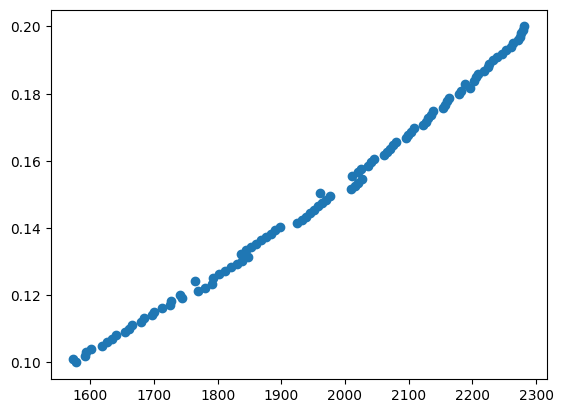

In [ ]:
# plt.scatter(vx,press,label="tpd Pbolha X x1(Agua)")
plt.scatter(press,vx)

##CO2 Puro

In [ ]:
p=CPAParameters.from_records(
    cubic=[c_w,c_co2,c_ch4],
    assoc=[a_w,a_co2,a_ch4])

p.set_cubic_binary(0,1,kij_a=0.0,kij_b=-0.147)
p.set_cubic_binary(0,2,kij_a=0.0,kij_b=0.2310)

p.set_assoc_binary(0,1,"mcr1",beta=0.1836)



eos=EquationOfState.cpa(p)


pWATER=CPAParameters.from_records(
    cubic=[c_w],
    assoc=[a_w])
PURE_WATER=EquationOfState.cpa(pWATER)
# print(pWATER_ACETIC.as_string())


pEQ=PhaseEquilibrium(eos)
# peq_WATER_CO2=PhaseEquilibrium(WATER_CO2)

In [ ]:
print(p.as_string())

 === Cubic Parameters ===
  Number of Components (ncomp): 3
  a0 (va0): [0.12277, 0.35079, 0.23204]
  b (vb):  [1.45e-5, 2.72e-5, 2.91e-5]
  kappa (c1):   [0.6736, 0.7602, 0.447]
  T_crit (vtc): [647.14, 304.12, 190.56]
  Binary Interaction Map (kᵢⱼ (a,b) ): {(0, 1): (0.0, -0.147), (0, 2): (0.0, 0.231)}
 === Associative Parameters ===
  Number of Components (NC): 3
  Hard-sphere Volumes (vb):
    [1.45e-5, 2.72e-5, 2.91e-5]
  Epsilon Cross Matrix (εᵢⱼ):
    [16655.0, 14000.0, 0.0]
    [14000.0, 0.0, 0.0]
    [0.0, 0.0, 0.0]
  Beta Cross Matrix (βᵢⱼ):
    [0.0692, 0.0007, 0.0]
    [0.0007, 0.0, 0.0]
    [0.0, 0.0, 0.0]
  Association Site Matrix (Sⱼᵢ):
    [A(2.0), A(0.0), Null]
    [B(2.0), B(1.0), Null]
    [C(0.0), C(0.0), Null]
  Components (Self-Assoc. + Solvates): [0, 1]
  Binary Parameters (rule and lᵢⱼ=aT+b):
    [AssocBin { lij: 0.0, rule: CR1 }, AssocBin { lij: 0.0, rule: EXP }, AssocBin { lij: 0.0, rule: CR1 }]
    [AssocBin { lij: 0.0, rule: EXP }, AssocBin { lij: 0.0, rule: 

In [ ]:
def RES_pure_water(X,T,P):
  yw=10**X[0]
  y=np.array([yw,1-yw])

  s1=State.tpx(eos,T,P,y,"vapor")
  s2=State.tpx(PURE_WATER,T,P,np.array([1.0]),"liquid")

  return ( np.log(yw)+s1.ln_phi()[0] - s2.ln_phi()[0] )

T=294
P=12.7e5
fRES = lambda X: RES_pure_water(X,T,P)
yw_guess=2000*1e-6
X0=np.log10( yw_guess )
RESULT=opt.root(fRES,X0).x
# 10**(ans.x)

In [ ]:
10**RESULT

array([0.00226251])

In [ ]:
def watcon(peq,T,P, yguess,xw=.9):

  def fun(X):
    yw=10**X[0]
    z=np.array([ yw,1-yw] )
    wguess = np.array([xw,1-xw])

    return peq.tpd(T,P,z,"liquid",wguess,tol=1e-6,it_max=100)

  ans = opt.root( fun, [yguess])
  # ans = opt.minimize( fun, [yguess], method="Nelder-Mead")
  return ans.x

wguess = np.array([.999,.001])
yguess=np.log10(5000*1e-6)
ans = watcon(peq_WATER_CO2,294,20e5,yguess)
(10**ans)*1e6 #ok

array([1553.67607577])

In [ ]:
[wpsat(T),co2_psat(T)]

[np.float64(3214.4428147054273), np.float64(24811751.1287633)]

In [ ]:
peq_WATER_CO2

In [ ]:
y_dry_gas=np.array([0.0,0.5,0.5])




T=294
P=12.7e5
fRES = lambda X: RES(T,P,X)
yw_guess=2000*1e-6
# X0=np.log10( yw_guess )
RESULT=opt.root(fRES,[yw_guess]).x

0.002
1.0
0.002
1.0
0.002
1.0
0.0020000000298023225
1.0
0.0021284292890256266
1.0
0.0021325416243000357
1.0
0.0021326760834365216
1.0
0.0021326762185616215
1.0
0.0021326762185659215
1.0


In [ ]:
print(RESULT)

[0.00213268]


In [ ]:
# tpd_root_given_tp(T,500e5,peq_WATER_CO2)

array([0.00520978])

In [ ]:
T=273.15 + 25
#
PRESS_BAR=np.linspace(0.1,600,100)
yw=np.zeros_like(PRESS_BAR)
# press_orv=np.zeros_like(water_PPM)
# press_bolha=np.zeros_like(water_PPM)
# y_dry_gas=np.array([0.0,0.5,0.5])
y_dry_gas=np.array([0.0,1.0,1e-20])

for (i,P_BAR) in enumerate(PRESS_BAR):

  try:
    # xw=xw*1e-6
    # z=np.array([xw,1-xw])

    P_PA=P_BAR*1e5

    # porv=tpd_root(T,z,incipient_phase="liquid",phase_equilibrium=peq_WATER_CO2,psat=np.array([wpsat(T),co2_psat(T)]))
    # porv=tpd_root(T,z,incipient_phase="liquid",phase_equilibrium=peq_WATER_CO2,psat=np.array([wpsat(T),co2_psat(T)]))
    # pbol=tpd_root(T,z,incipient_phase="vapor",phase_equilibrium=peq_WATER_CO2,psat=np.array([wpsat(T),co2_psat(T)]))

    result=tpd_root_given_tp(T,P_PA,y_dry_gas,pEQ)
    # press_bolha[i]=pbol/1e5
    # print(porv/1e5)
    # press_orv[i]=porv/1e5
    yw[i]=result[0]

  except Exception as e:
    print(e)
    pass
    continue



aqui
0.002
0.002
0.002
0.0020000000298023225
0.012130593585598806
0.03046976110596695
0.06714809614670322
0.13931109169542277
0.22104077697810867
0.285857134548299
0.31342262691356615
0.3186206065960909
0.31890943511393166
0.3189119564806244
0.3189119576364529
guess= 0.3189119576364529
[0.31891196]
Z= [3.18911958e-01 6.81088042e-01 6.81088042e-21]
[0.31891196]
Z= [3.18911958e-01 6.81088042e-01 6.81088042e-21]
[0.31891196]
Z= [3.18911958e-01 6.81088042e-01 6.81088042e-21]
[0.31891196]
Z= [3.18911962e-01 6.81088038e-01 6.81088038e-21]
[0.31890183]
Z= [3.18901828e-01 6.81098172e-01 6.81098172e-21]
[0.31890183]
Z= [3.1890183e-01 6.8109817e-01 6.8109817e-21]
aqui
0.002
0.002
0.002
0.0020000000298023225
0.004028041023503241
0.0049413657341653115
0.005440629078574772
0.005521464613733497
0.005526084498263044
0.005526120904950238
0.005526120920427967
guess= 0.005526120920427967
[0.00552612]
Z= [5.52612092e-03 9.94473879e-01 9.94473879e-21]
[0.00552612]
Z= [5.52612092e-03 9.94473879e-01 9.94473

(0.0, 600.0)

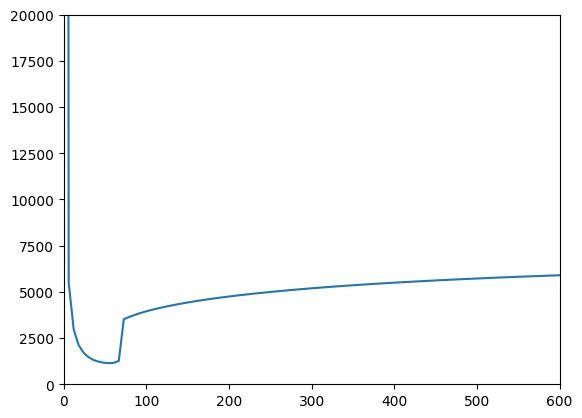

In [ ]:
plt.plot(PRESS_BAR,yw*1e6)
# vx
plt.ylim(0,20*1e3)
plt.xlim(0,600)

In [ ]:
# T=273.15 + 25
#
pres=[51.7  ,
76.   ,
101.3 ,
126.7 ,
152.  ,
177.3 ,
202.7 ]
T=298.15


# press_orv=np.zeros_like(water_PPM)
# press_bolha=np.zeros_like(water_PPM)
# y_dry_gas=np.array([0.0,0.5,0.5])
y_dry_gas=np.array([0.0,0.5,1e-8])

for (i,P_BAR) in enumerate(pres):

  try:

    P_PA=P_BAR*1e5
    result=tpd_root_given_tp(T,P_PA,y_dry_gas,pEQ)
    yw[i]=result[0]

    print("P=",P_BAR)
    print('yw=',yw[i]*1e6)

  except Exception as e:
    print(e)
    pass
    continue



P= 51.7
yw= 1151.9466440577864
P= 76.0
yw= 7145.359266095061
P= 101.3
yw= 8457.558254350766
P= 126.7
yw= 9484.499391004889
P= 152.0
yw= 10357.09019698289
P= 177.3
yw= 11132.44798494583
P= 202.7
yw= 11840.11478532415


In [ ]:
p=CPAParameters.from_records(
    cubic=[c_w,c_co2],
    assoc=[a_w,a_co2])

p.set_cubic_binary(0,1,kij_a=0.0,kij_b=-0.147)

p.set_assoc_binary(0,1,"mcr1",beta=0.1836)



eos=EquationOfState.cpa(p)


pWATER=CPAParameters.from_records(
    cubic=[c_w],
    assoc=[a_w])
PURE_WATER=EquationOfState.cpa(pWATER)
# print(pWATER_ACETIC.as_string())


pEQ=PhaseEquilibrium(eos)
# peq_WATER_CO2=PhaseEquilibrium(WATER_CO2)

In [ ]:
# T=273.15 + 25
#
pres=[51.7  ,
76.   ,
101.3 ,
126.7 ,
152.  ,
177.3 ,
202.7 ]
T=298.15


# press_orv=np.zeros_like(water_PPM)
# press_bolha=np.zeros_like(water_PPM)
# y_dry_gas=np.array([0.0,0.5,0.5])
y_dry_gas=np.array([0.0,1.0])

for (i,P_BAR) in enumerate(pres):

  try:

    P_PA=P_BAR*1e5
    result=tpd_root_given_tp(T,P_PA,y_dry_gas,pEQ)
    yw[i]=result[0]

    print("P=",P_BAR)
    print('yw=',yw[i]*1e6)

  except Exception as e:
    print(e)
    pass
    continue



P= 51.7
yw= 1151.9466596170291
P= 76.0
yw= 7145.360328563534
P= 101.3
yw= 8457.559342166895
P= 126.7
yw= 9484.500541563857
P= 152.0
yw= 10357.09141729092
P= 177.3
yw= 11132.44927638465
P= 202.7
yw= 11840.116147813227


In [ ]:
P= 51.7
yw= 1151.9466440577864
P= 76.0
yw= 7145.359266095061
P= 101.3
yw= 8457.558254350766
P= 126.7
yw= 9484.499391004889
P= 152.0
yw= 10357.09019698289
P= 177.3
yw= 11132.44798494583
P= 202.7
yw= 11840.11478532415

In [ ]:
#Fig. 7, Application of the CPA equation of state to organic acids

pPROPANOIC_HEPTANE=CPAParameters.from_records(
    cubic=[c_propanoic,c_heptane],
    assoc=[a_propanoic,a_heptane])

pPROPANOIC_HEPTANE.set_cubic_binary(0,1,0.0,  0.029)

PROPANOIC_HEPTANE=EquationOfState.cpa(pPROPANOIC_HEPTANE)
# print(pWATER_ACETIC.as_string())

peq=PhaseEquilibrium(PROPANOIC_HEPTANE)
# p,y,vx=vle_diagram(T,peq,factor=1e3)
